#Project #1
- Christopher Dalmau
- Andrew Franklin
- Due: Sep 29th
- Professor: Dr. Hamed Yaghoobian


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('Pokemon.csv')

#Business Understanding
- This data set consist of over 1000 different pokemon.
- Our goal for our vizualizations is to see if we can find any relationships with various stats.
- This can potentially show different patterns that occurs during the designing process of creating different pokemon.
- People all around the world from a wide range of ages love pokemon.
- We hope to bring some different insights of some of the pokemon we have come to love regarding their stats.

In [3]:
df.head()

,number,name,type1,type2,total,hp,attack,defense,sp_attack,sp_defense,speed,generation,legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,Mega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,3,Gigantamax Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1072 entries, 0 to 1071
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   number      1072 non-null   int64 
 1   name        1072 non-null   object
 2   type1       1072 non-null   object
 3   type2       574 non-null    object
 4   total       1072 non-null   int64 
 5   hp          1072 non-null   int64 
 6   attack      1072 non-null   int64 
 7   defense     1072 non-null   int64 
 8   sp_attack   1072 non-null   int64 
 9   sp_defense  1072 non-null   int64 
 10  speed       1072 non-null   int64 
 11  generation  1072 non-null   int64 
 12  legendary   1072 non-null   bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 101.7+ KB


#Data Understanding
  - The data has a mix of categorical and numerical data.
  - There are 1072 entries and 13 features
  - Integers: number, total, hp, attack, defense, sp_attack, sp_defense, speed, and generation.
  - Strings: name, type1, and type2
  - Boolean: legendary.

In [5]:
#Searching for duplicates in the data
duplicates = df.duplicated().sum()
print("Duplicates: ", duplicates)
#searching for missing values in the data
missing = df.isnull().sum()
print("Missing Values: ", missing)


Duplicates:  0
Missing Values:  number          0
name            0
type1           0
type2         498
total           0
hp              0
attack          0
defense         0
sp_attack       0
sp_defense      0
speed           0
generation      0
legendary       0
dtype: int64


- There are no duplicates in the dataset
- There are 498 missing values for the feature type2 which makes sense because not all pokemon have a secondary type. I will leave this as is because this was something that was expected.

#3 Questions
- Is there a relation of a pokemons hp and a pokemon's defense.?
- Is there a relation with the pokemons total and a certain set a stats?
  - Can the total be predicted based on defense, attack, speed, and special attack?
- Do the legendary pokemon in the dataset have significantly greater stats compared to other pokemon.
   - Can you predict if a pokemon is a legendary based soley on their stats?

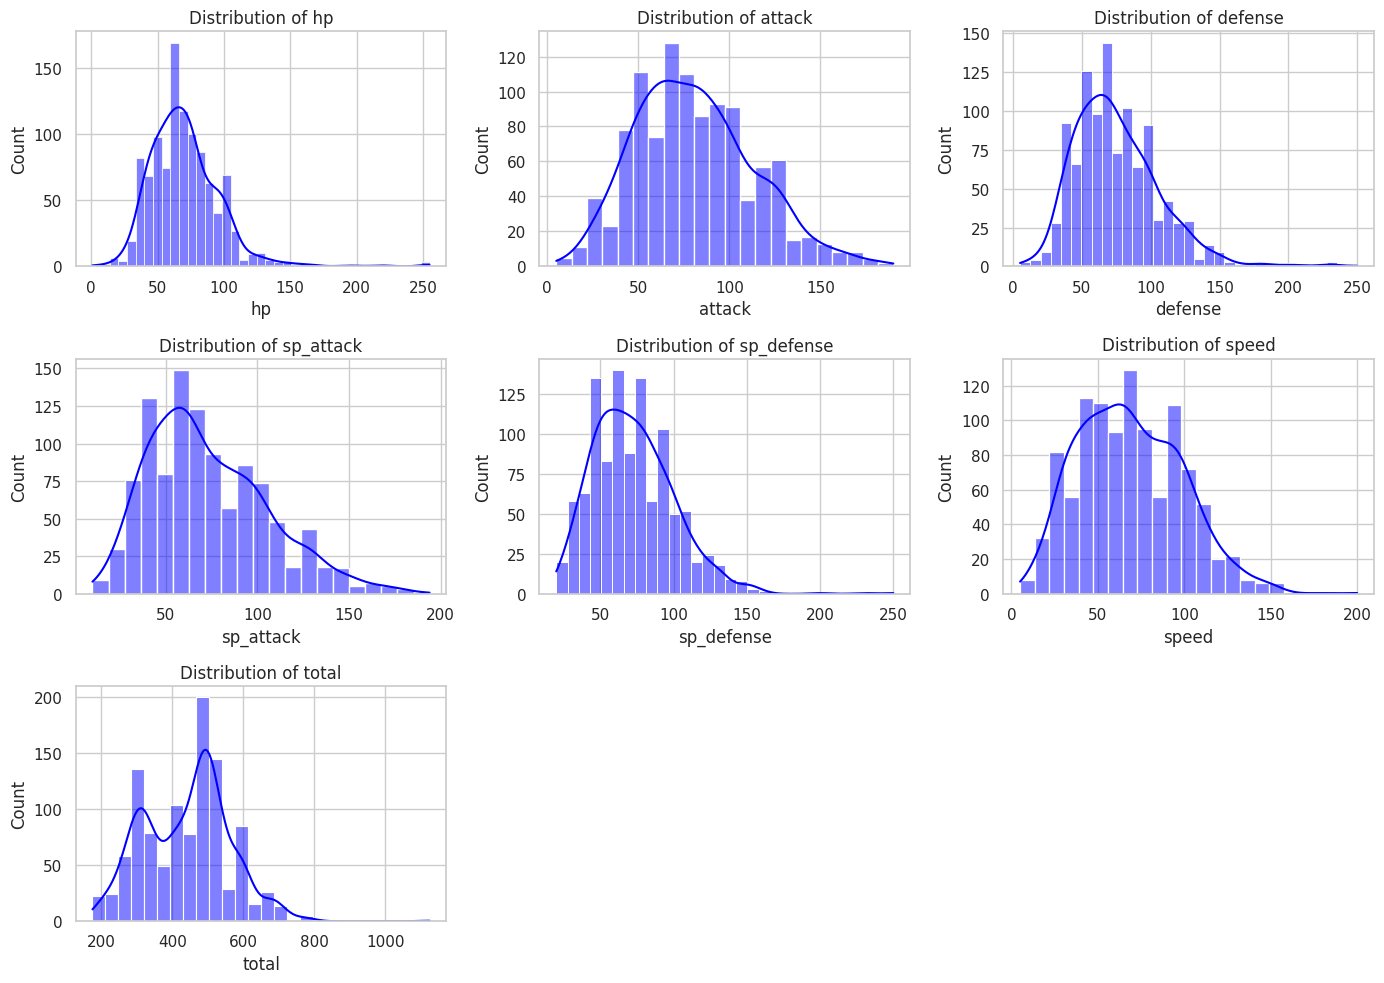

In [6]:
sns.set(style="whitegrid")

# List of numerical features to visualize
num_features = ['hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed', 'total']

# Plot histograms for each feature
plt.figure(figsize=(14, 10))
for i, feature in enumerate(num_features, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[feature], kde=True, color="blue")
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

- HP and Defense have distributons that show there are very few pokemon with extrememly high stats.
- Speed shows tat there are very few pokemon with very high speed. The majority of pokemon have a speed between 50-100.
- Attack, Special Attack, and Special Defense are slightly skewed to the right, with a larger number of Pokémon having lower values in these areas.

In [7]:
from sklearn.linear_model import LinearRegression

# Linear Regression
- My next visualizations is to see if defense stats have any correlation with hp

In [8]:
#create dataframe for hp and defense
stats = df[['hp', 'defense']]
stats.head()

,hp,defense
0,45,49
1,60,63
2,80,83
3,80,123
4,80,83


In [9]:
#reshaping into 2D array for model
X = df[['defense']].values.reshape(-1,1)
y = df['hp'].values.reshape(-1,1)

In [10]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [11]:
model.intercept_

array([50.96274419])

In [12]:
model.coef_

array([[0.26043275]])

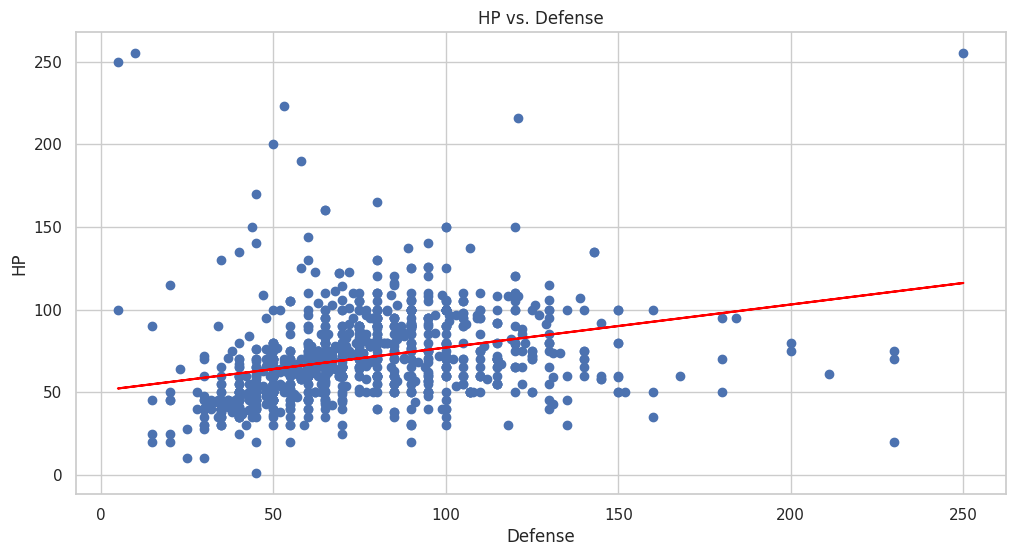

In [13]:
#predicting the hp values based on defense
y_pred = model.predict(X)
plt.figure(figsize=(12, 6))
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.xlabel('Defense')
plt.ylabel('HP')
plt.title('HP vs. Defense')
plt.show()

There is a very slight tilt upward which shows there is a very small correlation with the a pokemon's hp and their defense stats. This may mean that there is a lot of variation with different pokemon and their stats.

#Multiple Linear Regression
- The next visualization is using multiple linear regression
- This will use attack, defense, speed, and special attack to predict total.

In [14]:
#reshaping to fit the model
X = df[['attack', 'defense', 'speed','sp_attack']].values.reshape(-1,4)
y = df['total'].values.reshape(-1,1)

In [15]:
multiple_model = LinearRegression()
multiple_model.fit(X, y)

LinearRegression()

In [16]:
multiple_model.intercept_

array([47.1382966])

In [17]:
multiple_model.coef_

array([[1.14699206, 1.54388546, 1.0439592 , 1.54697219]])

In [18]:
predicted_total = multiple_model.predict(X)

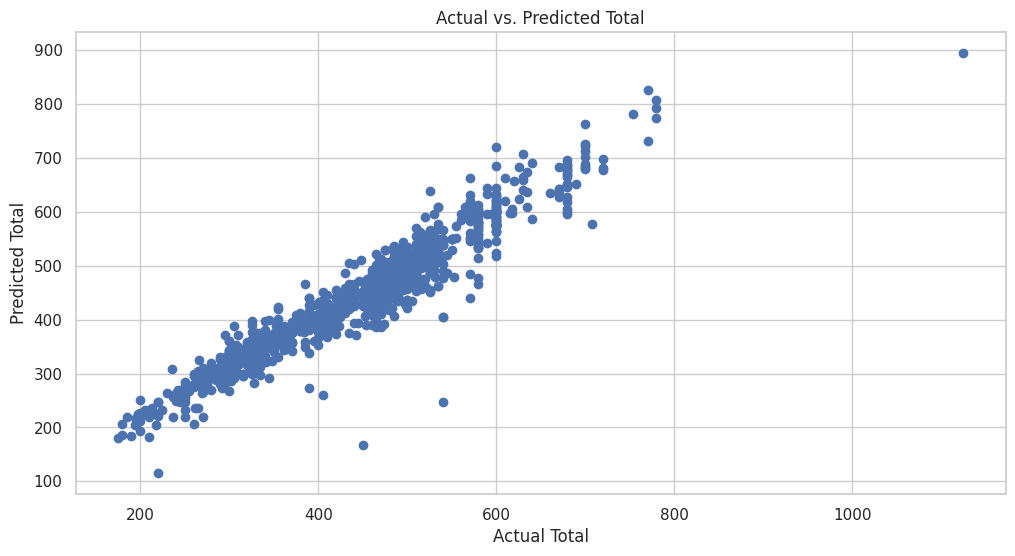

In [19]:
#predicting the total values based on defense, attack, speed, and special attack
plt.figure(figsize=(12, 6))
plt.scatter(y, predicted_total)
plt.xlabel('Actual Total')
plt.ylabel('Predicted Total')
plt.title('Actual vs. Predicted Total')
plt.show()

In [20]:
multiple_model.score(X, y)

0.921203267104853

- The accuracy for predicting thr total had an accuracy of 92%.

# Logistic Regression

1.   This code block will ask the user for input for a pokemon they wish to create
2.   The user must specify what the name if the pokemon they want to create is
3.   Then all stats like atk , def , spe , sp.atk , sp.def

Enter the name of the pokemon you wish to create: new pokemon
Enter attack: 300
Enter defense: 50
Enter special attack: 220
Enter special defense: 221
Enter speed: 190


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


new pokemon would be considered a legendary pokemon


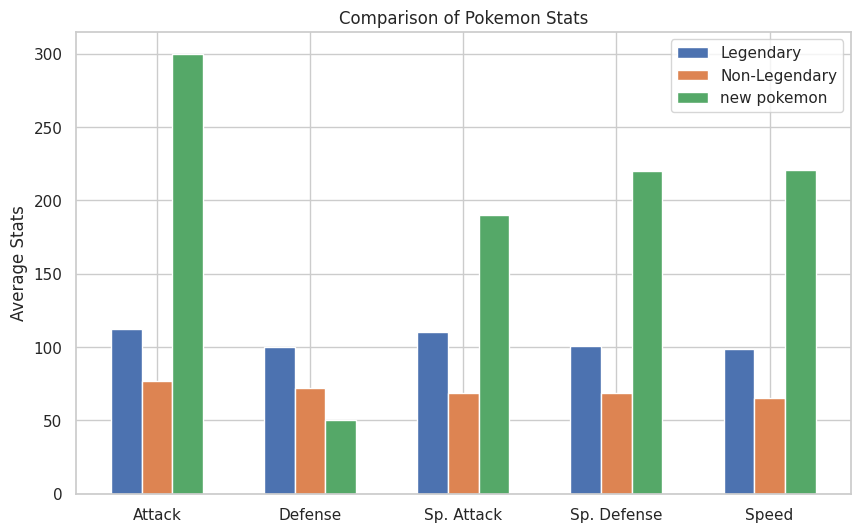

In [21]:
from sklearn.linear_model import LogisticRegression
stats = df[['attack', 'defense', 'speed','sp_attack','sp_defense']]
is_legendary = df['legendary'].ravel()

my_log_regressor = LogisticRegression()
my_log_regressor.fit(stats,is_legendary)
name = input("Enter the name of the pokemon you wish to create: ")
atk =  float(input("Enter attack: "))
Def =  float(input("Enter defense: "))
sp_atk =  float(input("Enter special attack: "))
sp_def =  float(input("Enter special defense: "))
spe =  float(input("Enter speed: "))

result =  my_log_regressor.predict([[atk,Def,spe,sp_atk,sp_def]])
if result == 1:
  print(f"{name} would be considered a legendary pokemon")
else:
  print(f"{name} would not be considered a legendary pokemon")
legendary_stats = df[df['legendary'] == True][['attack', 'defense', 'sp_attack', 'sp_defense', 'speed']].mean()
non_legendary_stats = df[df['legendary'] == False][['attack', 'defense', 'sp_attack', 'sp_defense', 'speed']].mean()
labels = ['Attack', 'Defense', 'Sp. Attack', 'Sp. Defense', 'Speed']
x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width, legendary_stats, width, label='Legendary')
rects2 = ax.bar(x, non_legendary_stats, width, label='Non-Legendary')
rects3 = ax.bar(x + width, [atk,Def,spe,sp_atk,sp_def], width, label=name)

# Add some text for labels, title and custom x-axis tick labels, etc.
#Now we will compare the made up pokemon stats to the average legendary and non legendary stats in a vizualization

ax.set_ylabel('Average Stats')
ax.set_title('Comparison of Pokemon Stats')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()


Enter the name of the Pokémon you wish to create: new pokemon
Enter Attack: 45
Enter Defense: 130
Enter Special Attack: 21
Enter Special Defense: 170
Enter Speed: 200


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Predicted type: Ground


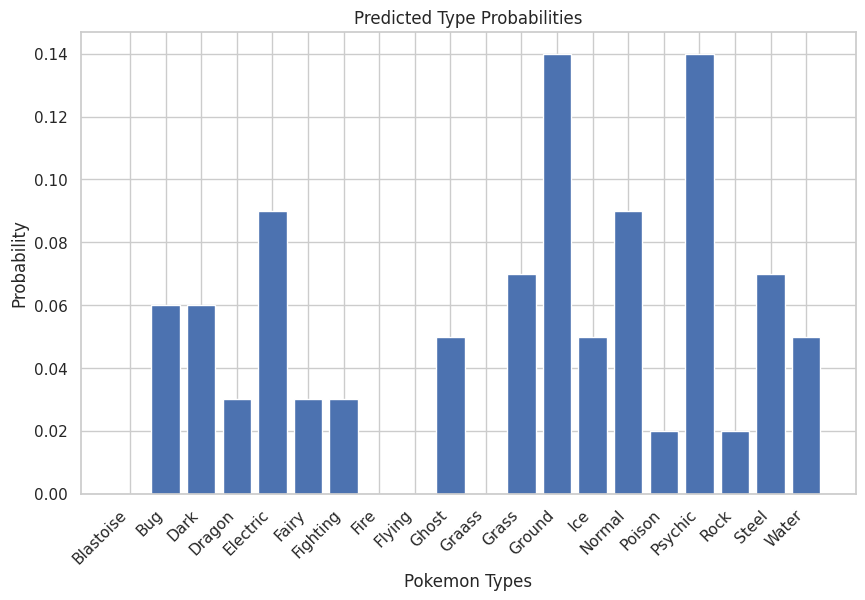

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import numpy as np

# Get user input for Pokémon creation
name = input("Enter the name of the Pokémon you wish to create: ")
atk = float(input("Enter Attack: "))
Def = float(input("Enter Defense: "))
sp_atk = float(input("Enter Special Attack: "))
sp_def = float(input("Enter Special Defense: "))
spe = float(input("Enter Speed: "))
# Features and target variable
features = df[['attack', 'defense', 'sp_attack', 'sp_defense', 'speed']]
target = df['type1']

# Encode the target variable (categorical)
le = LabelEncoder()
target_encoded = le.fit_transform(target)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target_encoded, test_size=0.2, random_state=42)

# Create and train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Sample Pokemon stats (replace with user input)
new_pokemon = [[atk,Def,sp_atk,sp_def,spe]]

# Predict the type
predicted_type = model.predict(new_pokemon)

# Decode the prediction to get the type name
predicted_type_name = le.inverse_transform(predicted_type)
print(f"Predicted type: {predicted_type_name[0]}")

# Get probabilities for each type
probabilities = model.predict_proba(new_pokemon)[0]

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(le.classes_, probabilities)
plt.xlabel('Pokemon Types')
plt.ylabel('Probability')
plt.title('Predicted Type Probabilities')
plt.xticks(rotation=45, ha='right')
plt.show()

In [23]:
from google.colab import files
uploaded_files = files.upload()

# Convert ipynb to html
import subprocess
notebook_filename = list(uploaded_files.keys())[0]
subprocess.run(["pip", "install", "nbconvert"])
subprocess.run(["jupyter", "nbconvert", notebook_filename, "--to", "html"])

# Download the html version
html_filename = notebook_filename[:-6] + ".html" # correct the slicing to avoid error
files.download(html_filename)

IndexError: list index out of range